# Self Organizing Map

### We will use the SOM for Fraud Detection
### Lets say you are a ML engineer at a bank and you are given a dataset that contains information about customers from this bank applying for an advanced credit-card, our mission is to detect potential frauds

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing the dataset

dataset = pd.read_csv('Credit_Card_Applications.csv')

In [3]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Remember we didnt split the dataset into X and y, to predict y. It is done so to make a distinction in the end  between customers who were approved and the ones who weren't. Therefore while training, we will only use X.

In [7]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [8]:
# Training the SOM

from minisom import MiniSom

In [9]:
SOM = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)

In [10]:
SOM.random_weights_init(X)
SOM.train_random(data=X, num_iteration=100)

In [14]:
# Visualizing the Results

from pylab import bone, pcolor, colorbar, plot, show
%pylab inline

Populating the interactive namespace from numpy and matplotlib


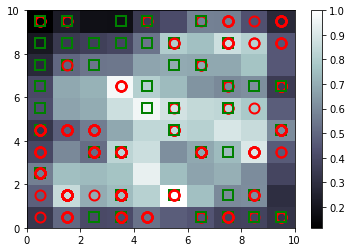

In [26]:
bone()
pcolor(SOM.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']

for i, x in enumerate(X):
    w = SOM.winner(x)
    plot(w[0] + 0.5, 
         w[1] + 0.5, 
         markers[y[i]], 
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)

### All the different colors corresponds to the MID(Mean Inter-Neuron Distances)

### The white colored boxes are the outliers/frauds

In [29]:
# Finding the frauds

mappings = SOM.win_map(X)

In [33]:
frauds = np.concatenate((mappings[(5, 1)], mappings[(7, 9)]), axis=0)

In [34]:
frauds = sc.inverse_transform(frauds)

In [35]:
frauds

array([[1.5808662e+07, 0.0000000e+00, 4.6000000e+01, 4.0000000e+00,
        2.0000000e+00, 5.0000000e+00, 3.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.0000000e+02, 9.6100000e+02],
       [1.5757188e+07, 0.0000000e+00, 2.0830000e+01, 3.0000000e+00,
        2.0000000e+00, 6.0000000e+00, 4.0000000e+00, 4.0000000e-02,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.0000000e+02, 1.0000000e+00],
       [1.5752344e+07, 0.0000000e+00, 2.1080000e+01, 5.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.5776545e+07, 0.0000000e+00, 2.5000000e+01, 1.1000000e+01,
        1.0000000e+00, 6.0000000e+00, 4.0000000e+00, 4.5000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00,

# These are the potential frauds